## Basic Bayesian Poisson Regression and Prediction
### Alex Bass

In [26]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import os
import bambi as bmb

from formulae import design_matrices

In [27]:
data = pd.read_csv('/Users/alex/Library/CloudStorage/OneDrive-Personal/DS6040/Project - School Shootings/Finalized_Data/train.csv') #reading in final data
data.columns

Index(['STATE', 'gun_own', 'hunt_license', 'background_checks',
       'gun_permit_law', 'under40', 'Male', 'White', 'Black', 'Asian',
       'Hispanic', 'Unemployment_rate_2021', 'Median_Household_Income_2020',
       'ba_plus', 'less_than_hs', 'hs', 'some_col', 'population', 'n',
       'gun_strictness', 'rural', 'suburban', 'urban'],
      dtype='object')

In [28]:
data.dropna(inplace = True) #dropping NAs

In [29]:
#scaling all data
columns_to_scale = ['gun_own',
       'hunt_license', 'under40', 'Male', 'White', 'Black', 'Asian',
       'Hispanic', 'Unemployment_rate_2021', 'Median_Household_Income_2020',
       'ba_plus', 'less_than_hs', 'hs', 'some_col',
       'population', 'n', 'gun_strictness']

data[columns_to_scale] = data[columns_to_scale].apply(lambda x : (x - np.mean(x))/np.std(x))

In [74]:
fml = "n ~ gun_own + hunt_license + binary(background_checks) + binary(gun_permit_law) + under40 + Male + White + Black + Asian + Hispanic + Unemployment_rate_2021 + Median_Household_Income_2020 + ba_plus + less_than_hs + hs + some_col + binary(urban) + binary(suburban) + binary(rural) + population + gun_strictness"  # full formulae formulation

dm = design_matrices(fml, data, na_action="error")

mx_ex = dm.common.as_dataframe()
mx_en = dm.response.as_dataframe()

mx_ex

,Intercept,gun_own,hunt_license,binary(background_checks),binary(gun_permit_law),under40,Male,White,Black,Asian,...,Median_Household_Income_2020,ba_plus,less_than_hs,hs,some_col,binary(urban),binary(suburban),binary(rural),population,gun_strictness
0,1.0,0.833042,-0.186645,1.0,1.0,0.397307,-0.717680,-0.495257,0.745100,-0.136231,...,0.694312,0.589642,-0.184500,-0.346835,-0.382626,0.0,1.0,1.0,-0.145751,-1.154567
1,1.0,0.833042,-0.186645,1.0,1.0,-0.419029,-0.718403,0.187723,-0.039755,-0.172758,...,0.939418,0.960109,-0.475586,-0.917436,0.061710,0.0,1.0,1.0,0.355878,-1.154567
2,1.0,0.833042,-0.186645,1.0,1.0,0.204220,1.238609,-2.151528,2.691732,-0.374357,...,-1.276080,-1.134098,2.131007,0.245205,-0.690082,1.0,0.0,1.0,-0.239213,-1.154567
3,1.0,0.833042,-0.186645,1.0,1.0,0.386655,1.392354,-0.464478,0.825132,-0.460765,...,-0.449379,-1.161714,1.112068,1.511475,-1.235287,0.0,1.0,1.0,-0.246082,-1.154567
4,1.0,0.833042,-0.186645,1.0,1.0,0.074468,-0.388431,0.699984,-0.530321,-0.425066,...,-0.154428,-0.965131,0.790681,0.158194,0.638844,0.0,1.0,1.0,-0.139885,-1.154567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,1.0,2.206241,1.079379,1.0,1.0,1.234813,0.612461,0.573391,-0.549638,-0.171511,...,0.901519,-0.143786,-0.823092,-0.224346,1.501087,1.0,0.0,1.0,-0.186291,-2.055884
3137,1.0,2.206241,1.079379,1.0,1.0,0.661028,0.720313,0.648044,-0.596664,0.035955,...,2.405455,3.348400,-1.173494,-2.484783,-1.319654,1.0,1.0,0.0,-0.242875,-2.055884
3138,1.0,2.206241,1.079379,1.0,1.0,0.884406,0.190871,0.668374,-0.595385,-0.366069,...,0.947039,-0.361401,-0.911429,0.505643,0.988468,1.0,1.0,0.0,-0.252580,-2.055884
3139,1.0,2.206241,1.079379,1.0,1.0,-0.643928,0.290855,0.620004,-0.608385,-0.255988,...,0.074132,0.124250,-0.729335,-0.699993,1.565122,1.0,1.0,0.0,-0.289808,-2.055884


In [77]:
quick_prior_change = 10
Bernoulli_prior = 0.5

with pm.Model() as mdl_fish:

    # define priors, weakly informative Normal
    b0 = pm.Normal("Intercept", mu=0, sigma=quick_prior_change)
    b1 = pm.Bernoulli("binary(background_checks)", p=Bernoulli_prior)#pm.Bernoulli("background_checks", p=Bernoulli_prior)
    b2 = pm.Bernoulli("binary(gun_permit_law)", p=Bernoulli_prior)
    b3 = pm.Normal("under40", mu=0, sigma=quick_prior_change)
    b4 = pm.Normal("Male", mu=0, sigma=quick_prior_change)
    b5 = pm.Normal("White", mu=0, sigma=quick_prior_change)
    b6 = pm.Normal("Black", mu=0, sigma=quick_prior_change)
    b7 = pm.Normal("Asian", mu=0, sigma=quick_prior_change)
    b8 = pm.Normal("Hispanic", mu=0, sigma=quick_prior_change)
    b9 = pm.Normal("Unemployment_rate_2021", mu=0, sigma=quick_prior_change)
    b10 = pm.Normal("Median_Household_Income_2020", mu=0, sigma=quick_prior_change)
    b11 = pm.Normal("ba_plus", mu=0, sigma=quick_prior_change)
    b12 = pm.Normal("less_than_hs", mu=0, sigma=quick_prior_change)
    b13 = pm.Normal("hs", mu=0, sigma=quick_prior_change)
    b14 = pm.Normal("some_col", mu=0, sigma=quick_prior_change)
    b15 = pm.Normal("population", mu=0, sigma=quick_prior_change)
    b16 = pm.Normal("gun_strictness", mu=0, sigma=quick_prior_change)
    b17 = pm.Bernoulli("binary(urban)", p=Bernoulli_prior)
    b18 = pm.Bernoulli("binary(suburban)", p=Bernoulli_prior)
    b19 = pm.Bernoulli("binary(rural)", p=Bernoulli_prior)

    # define linear model and exp link function
    theta = (
        b0
        + b1 * mx_ex["binary(background_checks)"].values
        + b2 * mx_ex["binary(gun_permit_law)"].values
        + b3 * mx_ex["under40"].values
        + b4 * mx_ex["Male"].values
        + b5 * mx_ex["White"].values
        + b6 * mx_ex["Black"].values
        + b7 * mx_ex["Asian"].values
        + b8 * mx_ex["Hispanic"].values
        + b9 * mx_ex["Unemployment_rate_2021"].values
        + b10 * mx_ex["Median_Household_Income_2020"].values
        + b11 * mx_ex["ba_plus"].values
        + b12 * mx_ex["less_than_hs"].values
        + b13 * mx_ex["hs"].values
        + b14 * mx_ex["some_col"].values
        + b15 * mx_ex["population"].values
        + b16 * mx_ex["gun_strictness"].values
        + b17 * mx_ex["binary(urban)"].values
        + b18 * mx_ex["binary(suburban)"].values
        + b19 * mx_ex["binary(rural)"].values
    )

    ## Define Poisson likelihood
    y = pm.Poisson("y", mu=pm.math.exp(theta), observed=mx_en["n"].values)

In [79]:
with mdl_fish:
    inf_fish = pm.sample(500, tune=1000, cores=4, return_inferencedata=True, nuts={'target_accept':0.95}) #nuts={'target_accept':0.95}

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [gun_strictness, population, some_col, hs, less_than_hs, ba_plus, Median_Household_Income_2020, Unemployment_rate_2021, Hispanic, Asian, Black, White, Male, under40, Intercept]
>BinaryGibbsMetropolis: [binary(background_checks), binary(gun_permit_law), binary(urban), binary(suburban), binary(rural)]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 640 seconds.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.


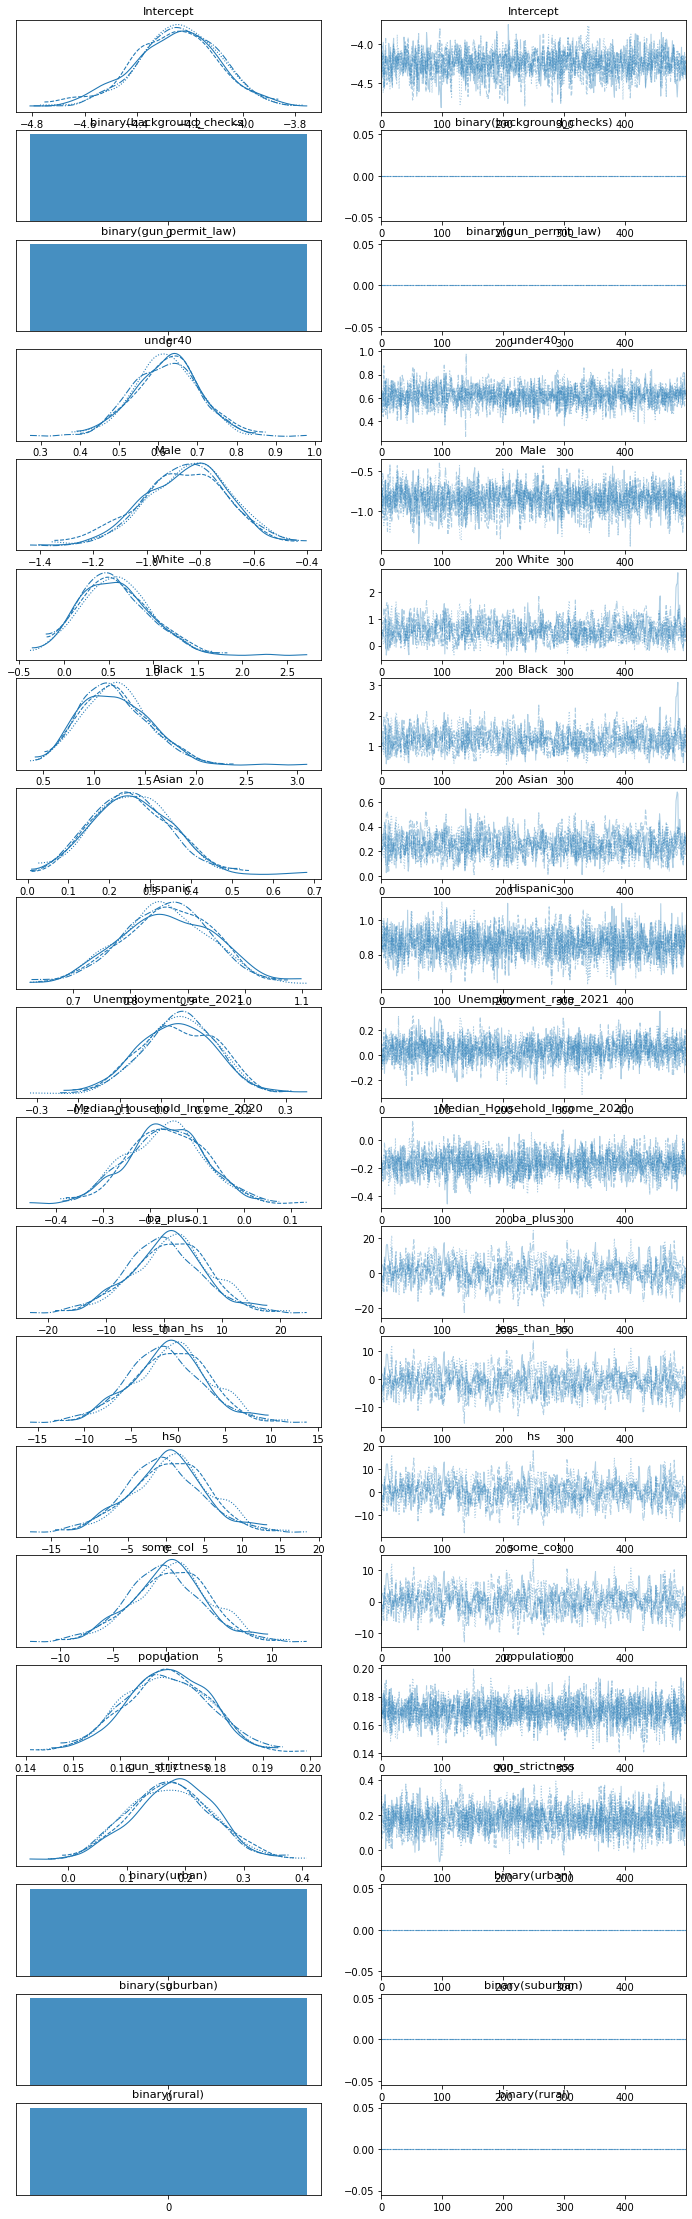

In [80]:
az.plot_trace(inf_fish);

In [81]:
az.summary(np.exp(inf_fish.posterior), kind="stats")

,mean,sd,hdi_3%,hdi_97%
Intercept,1.400000e-02,2.000000e-03,0.010,0.019
binary(background_checks),1.000000e+00,0.000000e+00,1.000,1.000
binary(gun_permit_law),1.000000e+00,0.000000e+00,1.000,1.000
under40,1.867000e+00,1.560000e-01,1.592,2.173
Male,4.320000e-01,6.800000e-02,0.310,0.567
White,1.932000e+00,9.010000e-01,0.822,3.481
Black,3.557000e+00,1.390000e+00,1.667,5.971
Asian,1.295000e+00,1.260000e-01,1.063,1.516
Hispanic,2.377000e+00,1.890000e-01,2.033,2.718
Unemployment_rate_2021,1.047000e+00,9.600000e-02,0.863,1.212


In [53]:
model = bmb.Model(fml, data, family="poisson")

In [36]:
inf_fish_alt = model.fit(draws=2000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, gun_own, hunt_license, background_checks, gun_permit_law, under40, Male, White, Black, Asian, Hispanic, Unemployment_rate_2021, Median_Household_Income_2020, ba_plus, less_than_hs, hs, some_col, urban, suburban, rural, population, gun_strictness]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pymc/step_methods/hmc/quadpotential.py:258: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, self._stds, out=self._inv_stds)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pymc/step_methods/hmc/quadpotential.py:237: RuntimeWarning: invalid value encountered in multiply
  return np.multiply(self._var, x, out=out)

The default initialization using init='auto' has failed, trying to recover by switching to init='adapt_diag'
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, gun_own, hunt_license, background_checks, gun_permit_law, under40, Male, White, Black, Asian, Hispanic, Unemployment_rate_2021, Median_Household_Income_2020, ba_plus, less_than_hs, hs, some_col, urban, suburban, rural, population, gun_strictness]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 716 seconds.
There were 42 divergences after tuning. Increase `target_accept` or reparameterize.
There were 170 divergences after tuning. Increase `target_accept` or reparameterize.
There were 161 divergences after tuning. Increase `target_accept` or reparameterize.
There were 143 divergences after tuning. Increase `target_accept` or reparameterize.


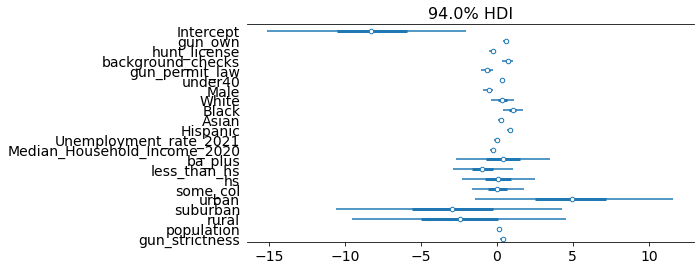

In [38]:
az.plot_forest(
    inf_fish_alt,
    combined=True,
    figsize=(8, 4)
);

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/plots/traceplot.py:212: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (22), generating only 20 plots
  warnings.warn(


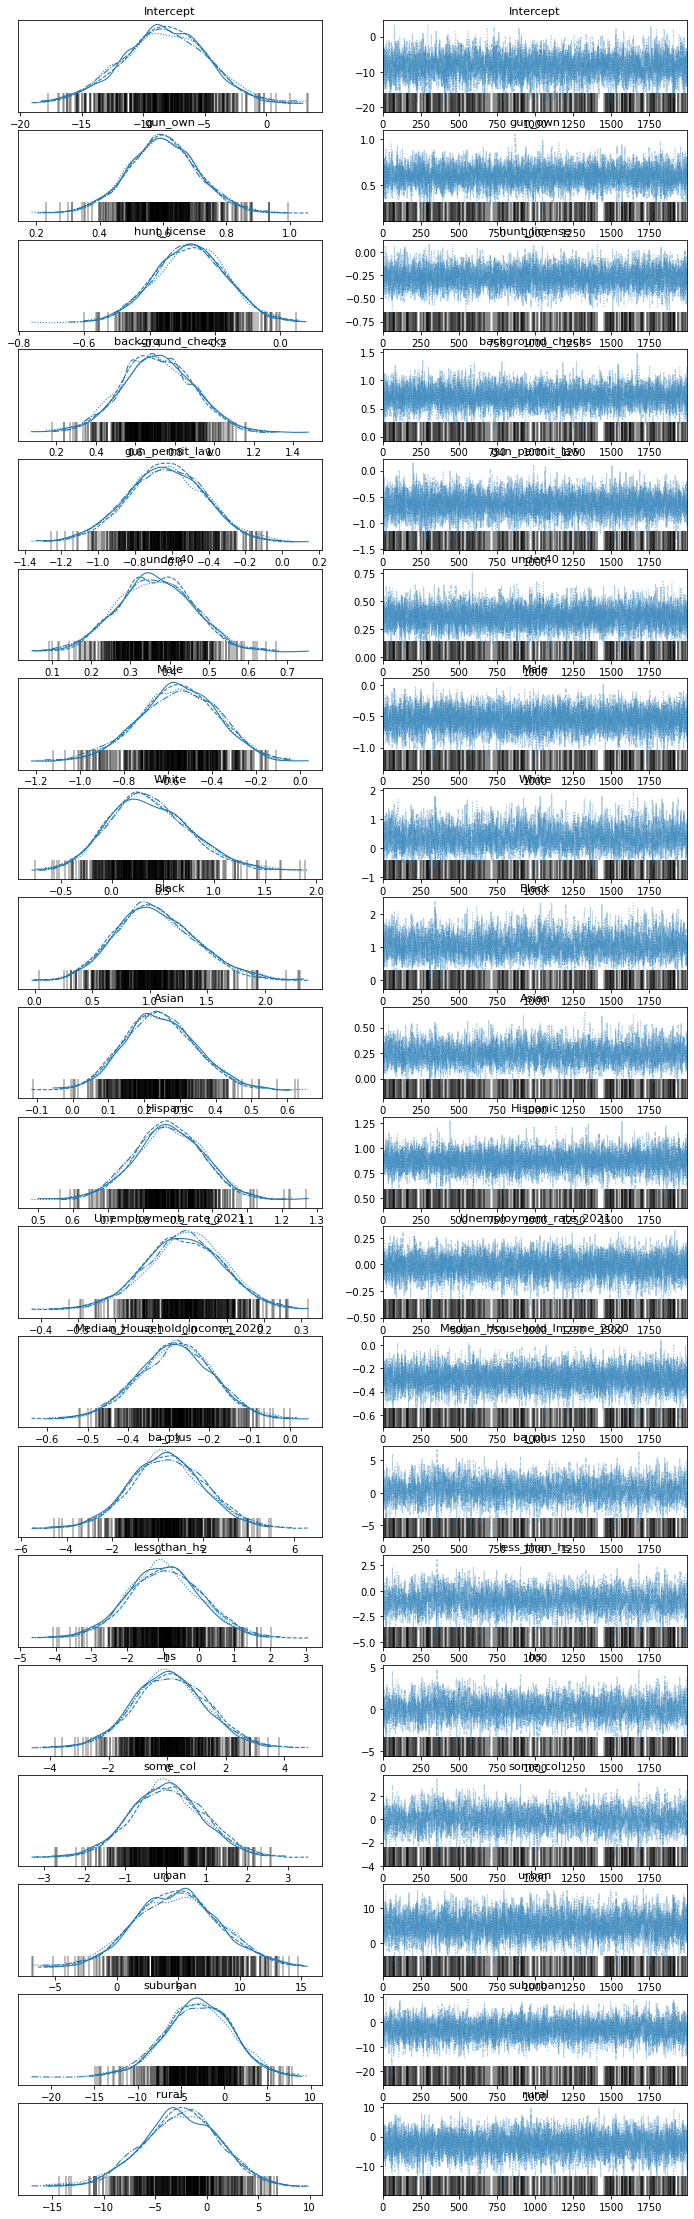

In [39]:
az.plot_trace(inf_fish_alt);

In [40]:
az.summary(np.exp(inf_fish_alt.posterior), kind="stats")

,mean,sd,hdi_3%,hdi_97%
Intercept,0.066,0.914,0.000,0.047
gun_own,1.832,0.203,1.466,2.232
hunt_license,0.764,0.085,0.605,0.921
background_checks,2.074,0.378,1.434,2.810
gun_permit_law,0.543,0.117,0.337,0.762
under40,1.445,0.140,1.200,1.710
Male,0.584,0.104,0.394,0.780
White,1.585,0.717,0.582,2.864
Black,3.076,1.190,1.361,5.255
Asian,1.285,0.132,1.058,1.546


In [41]:
model.posterior_predictive(inf_fish_alt, draws=None)

AttributeError: 'Model' object has no attribute 'posterior_predictive'

In [42]:
az.plot_ppc(inf_fish_alt, num_pp_samples=200);

TypeError: `data` argument must have the group "posterior_predictive" for ppcplot

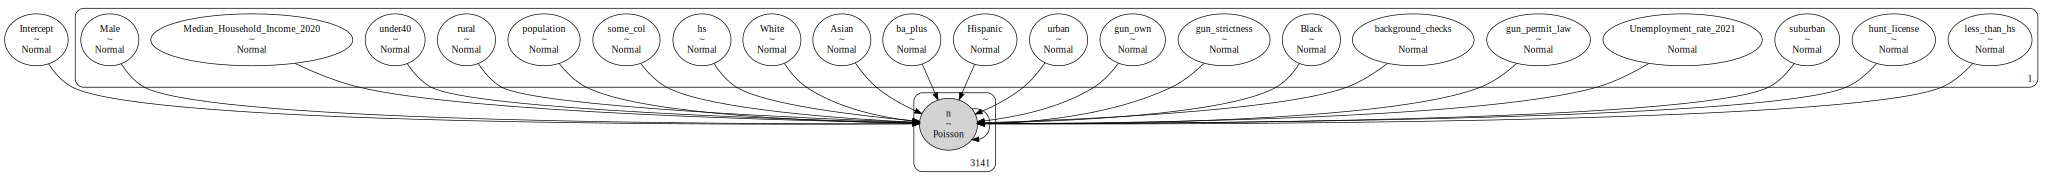

In [43]:
model.graph()

array([[<AxesSubplot:title={'center':'Unemployment_rate_2021'}>,
        <AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'gun_permit_law'}>,
        <AxesSubplot:title={'center':'gun_strictness'}>],
       [<AxesSubplot:title={'center':'under40'}>,
        <AxesSubplot:title={'center':'urban_rural'}>,
        <AxesSubplot:title={'center':'Male'}>,
        <AxesSubplot:title={'center':'hunt_license'}>],
       [<AxesSubplot:title={'center':'Median_Household_Income_2020'}>,
        <AxesSubplot:title={'center':'ba_plus'}>,
        <AxesSubplot:title={'center':'gun_own'}>,
        <AxesSubplot:title={'center':'White'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'less_than_hs'}>,
        <AxesSubplot:title={'center':'Black'}>,
        <AxesSubplot:title={'center':'background_checks'}>],
       [<AxesSubplot:title={'center':'Asian'}>,
        <AxesSubplot:title={'center':'some_col'}>,
        <AxesSubplot:titl

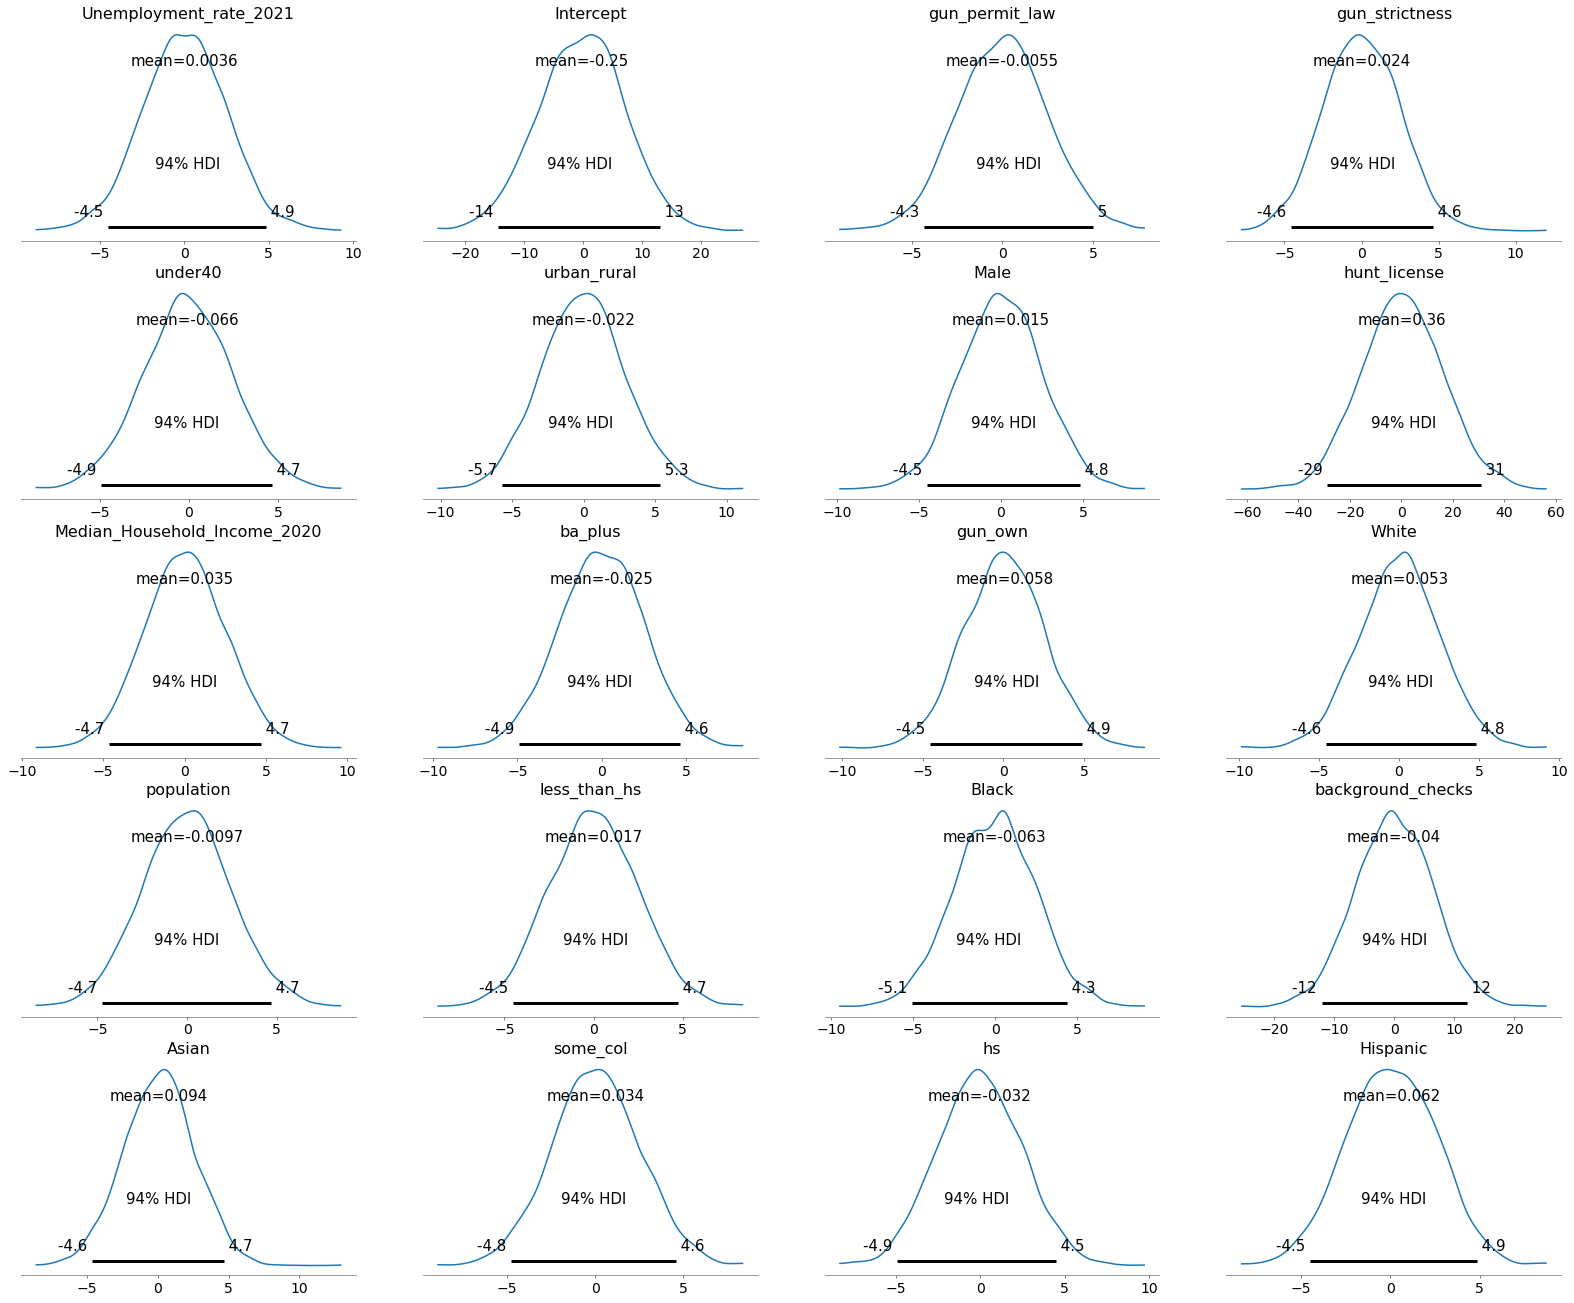

In [92]:
model.plot_priors()